In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio

In [2]:
data = scio.loadmat('digit.mat')
X = data['X']#训练数据
T = data['T']#测试数据
[d,m,c] = T.shape#256为16*16的像素图像向量化，“0”到“9”每个数字都有200个样本
print([d,m,c])

[256, 200, 10]


In [3]:
S = np.zeros((256,256))
mu = np.zeros((256,c))
for i in range(0,c):
    mu[:,i] = np.mean(X[:,:,i],1)
    S+=np.cov(X[:,:,i])/c           #S的维度（256，256）
h = np.dot(np.linalg.inv(S),mu)     #256*10

In [4]:
p = np.zeros((10,200,10))
for k in range(0,c):
    p[:,:,k]=np.dot(h.T,T[:,:,k])-np.tile(sum(np.multiply(mu,h)).reshape(10,1),(1,m))/2

In [5]:
P = p.argmax(axis=0)

In [12]:
C = np.zeros((c,c))
for i in range(c):
    for j in range(c):
        C[i,j] = np.sum(P[:,i]==j)

In [13]:
C

array([[199.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  0., 169.,   8.,   8.,   1.,   2.,   4.,   8.,   0.,   0.],
       [  0.,   0., 182.,   1.,   5.,   0.,   2.,   8.,   1.,   1.],
       [  2.,   2.,   0., 182.,   0.,   1.,   0.,   3.,  10.,   0.],
       [  0.,   0.,  21.,   4., 162.,   1.,   0.,   4.,   4.,   4.],
       [  1.,   2.,   0.,   1.,   5., 185.,   0.,   3.,   0.,   3.],
       [  2.,   0.,   1.,   5.,   1.,   0., 181.,   0.,   9.,   1.],
       [  0.,   1.,  16.,   6.,   6.,   0.,   1., 164.,   3.,   3.],
       [  1.,   0.,   0.,   8.,   0.,   0.,   7.,   2., 182.,   0.],
       [  0.,   0.,   3.,   0.,   0.,   4.,   0.,   1.,   0., 192.]])

In [21]:
A = np.array([[1,3,2,5],[43,1,2,3],[3,2,4,2],[2,4,5,2]])
b = np.zeros(4)
for i in range(4):
    b[i]= np.sum(A[:,i]==j)
b

array([1., 1., 0., 1.])

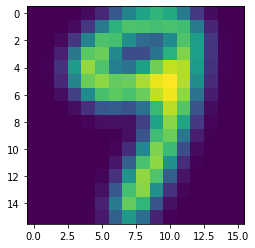

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.imshow(X[:,23,8].reshape((16,16)))